# Lake Model Solutions

## Excercise 1

We begin by initializing the variables and import the necessary modules

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from lake_model import LakeModel

In [18]:
import matplotlib
matplotlib.style.use('ggplot')

Construct the class containing the default parameters and record the steady state.

In [19]:
lm = LakeModel()
x0 = lm.rate_steady_state()  
print("Initial Steady State: %s" % x0)

Initial Steady State: [ 0.91733194  0.08266806]


Initialize the simulation values

In [20]:
N0 = 100
T = 50

New legislation changes $\lambda$ to $0.2$

In [21]:
lm.lmda = 0.2

In [22]:
xbar = lm.rate_steady_state() # new steady state
X_path = np.vstack(lm.simulate_stock_path(x0 * N0, T)) 
x_path = np.vstack(lm.simulate_rate_path(x0, T))
print("New Steady State: %s" % xbar)

New Steady State: [ 0.88690427  0.11309573]


Now plot stocks

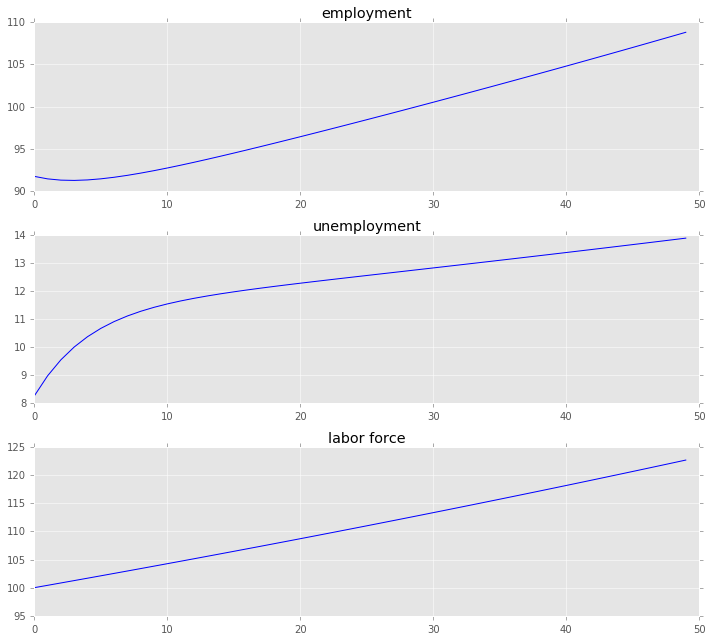

In [26]:
fig, axes = plt.subplots(3, 1, figsize=[10,9])
ax = axes[0]
ax.plot(X_path[:,0], 'b-')
ax.set_title('employment')

ax = axes[1]
ax.plot(X_path[:,1], 'b-')
ax.set_title('unemployment')

ax = axes[2]
ax.plot(X_path.sum(1), 'b-')
ax.set_title('labor force')

plt.tight_layout()
plt.show()

And how the rates evolve:

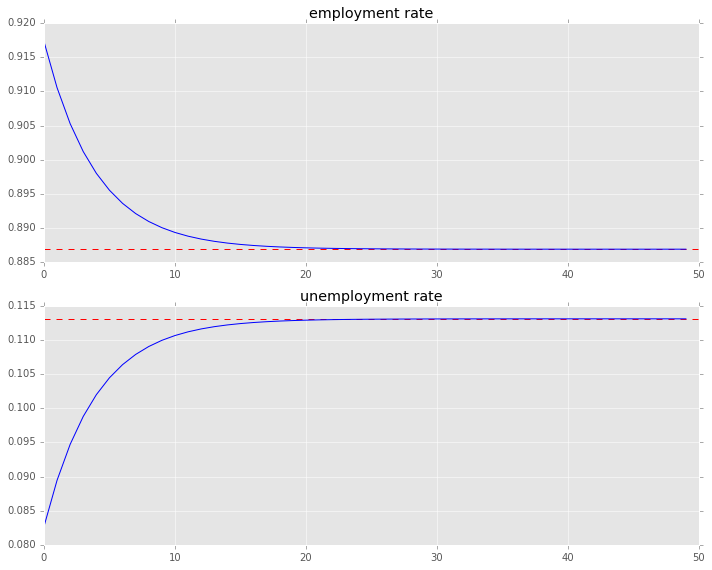

In [29]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

ax = axes[0]
ax.plot(x_path[:,0], 'b-')
ax.hlines(xbar[0],0,T,'r','--')
ax.set_title('employment rate')

ax = axes[1]
ax.plot(x_path[:,1], 'b-')
ax.hlines(xbar[1], 0, T, 'r','--')
ax.set_title('unemployment rate')

plt.tight_layout()
plt.show()

We see that it takes 20 periods for the economy to converge to it's new steady state levels

## Exercise 2

This next exercise has the economy expriencing a boom in entrances to the labor market and then later returning to the original levels.  For 20 periods the economy has a new entry rate into the labor market 

Let's start off at the baseline parameterization and record the steady state:

In [30]:
lm = LakeModel()
x0 = lm.rate_steady_state()

Here are the other parameters:

In [33]:
b_hat = 0.003
T_hat = 20

Let's increase $b$ to the new value and simulate for 20 periods

In [34]:
lm.b = b_hat
X_path1 = np.vstack(lm.simulate_stock_path(x0 * N0, T_hat)) # simulate stocks
x_path1 = np.vstack(lm.simulate_rate_path(x0, T_hat)) # simulate rates

Now we reset $b$ to the original value and then, using the state after 20 periods for the new initial conditions, we simulate for the additional 30 periods

In [35]:
lm.b = 0.0124
X_path2 = np.vstack(lm.simulate_stock_path(X_path1[-1,:2],T-T_hat+1)) # simulate stocks
x_path2 = np.vstack(lm.simulate_rate_path(x_path1[-1,:2],T-T_hat+1)) # simulate rates

Finally we combine these two paths and plot

In [36]:
x_path = np.vstack([x_path1,x_path2[1:]]) # note [1:] to avoid doubling period 20
X_path = np.vstack([X_path1,X_path2[1:]]) 

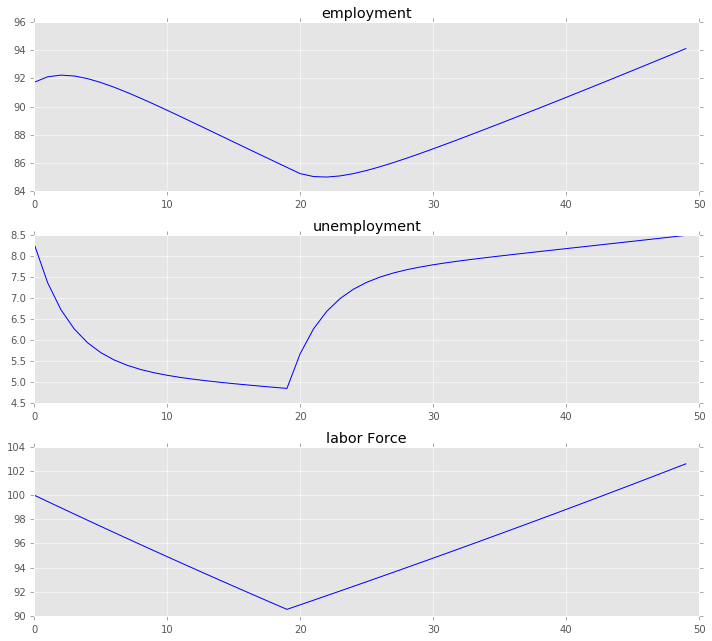

In [39]:
fig, axes = plt.subplots(3, 1, figsize=[10,9])

ax = axes[0]
ax.plot(X_path[:,0], 'b-')
ax.set_title('employment')

ax = axes[1]
ax.plot(X_path[:,1], 'b-')
ax.set_title('unemployment')

ax = axes[2]
ax.plot(X_path.sum(1), 'b-')
ax.set_title('labor Force')

plt.tight_layout()
plt.show()

And the rates:

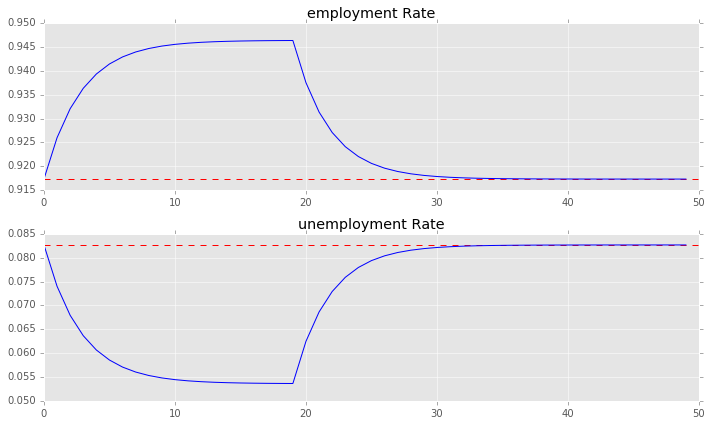

In [41]:
fig, axes = plt.subplots(2, 1, figsize=[10,6])

ax = axes[0]
ax.plot(x_path[:,0], 'b-')
ax.hlines(x0[0],0,T,'r','--')
ax.set_title('employment Rate')

ax = axes[1]
ax.plot(x_path[:,1], 'b-')
ax.hlines(x0[1],0,T,'r','--')
ax.set_title('unemployment Rate')

plt.tight_layout()
plt.show()